In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [2]:
# Read Data
df_original = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
df_original[df_original.isnull()] = 0
df_original.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df_original.shape

(7501, 20)

## Data Preprocessing

In [4]:
# to transactions
transactions = []
for i in range(0, 7501):
    transactions.append([str(df_original.values[i,j]) for j in range(0, 20)])

In [5]:
transactions[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [6]:
# one-hot encoded transactions
from mlxtend.preprocessing import OnehotTransactions
oht = OnehotTransactions()
oht_ary = oht.fit(transactions).transform(transactions)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.drop('0',axis=1,inplace=True)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Text(0,0.5,'item frequency (absolute)')

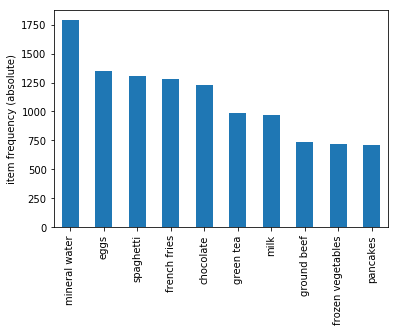

In [7]:
# Display top 10 items
df.sum(axis=0).sort_values(ascending=False)[0:10].plot(kind='bar')
plt.ylabel('item frequency (absolute)')

## Apriori

In [8]:
# Training Apriori on the dataset
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(df, min_support=0.004, use_colnames=True, max_len=None)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [9]:
# filter: confidence > 0.2
rules = rules[rules['confidence'] > 0.20]
rules.count()

antecedants           799
consequents           799
antecedent support    799
consequent support    799
support               799
confidence            799
lift                  799
leverage              799
conviction            799
dtype: int64

In [10]:
# show Top 10 results
rules.sort_values(by='lift', ascending=False).head(10)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
251,(light cream),(chicken),0.015598,0.059992,0.004533,0.290598,4.843951,0.003597,1.325072
483,(pasta),(escalope),0.015731,0.079323,0.005866,0.372881,4.700812,0.004618,1.468107
975,(pasta),(shrimp),0.015731,0.071457,0.005066,0.322034,4.506672,0.003942,1.369601
2636,"(frozen vegetables, ground beef)","(mineral water, spaghetti)",0.016931,0.059725,0.004399,0.259843,4.350622,0.003388,1.270371
1803,"(eggs, ground beef)",(herb & pepper),0.019997,0.049460,0.004133,0.206667,4.178455,0.003144,1.198160
950,(whole wheat pasta),(olive oil),0.029463,0.065858,0.007999,0.271493,4.122410,0.006059,1.282270
2239,"(herb & pepper, spaghetti)",(ground beef),0.016264,0.098254,0.006399,0.393443,4.004360,0.004801,1.486663
2233,"(herb & pepper, mineral water)",(ground beef),0.017064,0.098254,0.006666,0.390625,3.975683,0.004989,1.479789
764,(tomato sauce),(ground beef),0.014131,0.098254,0.005333,0.377358,3.840659,0.003944,1.448259
481,(mushroom cream sauce),(escalope),0.019064,0.079323,0.005733,0.300699,3.790833,0.004220,1.316568


In [11]:
# sort by the most likely rules
rules.sort_values(by='confidence', ascending=False).head(10)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2110,"(frozen vegetables, soup)",(mineral water),0.007999,0.238368,0.005066,0.633333,2.656954,0.003159,2.077178
2490,"(pancakes, soup)",(mineral water),0.006799,0.238368,0.004266,0.627451,2.632276,0.002645,2.044380
2557,"(tomatoes, olive oil)",(spaghetti),0.007199,0.174110,0.004399,0.611111,3.509912,0.003146,2.123717
2509,"(pancakes, whole wheat rice)",(mineral water),0.006932,0.238368,0.004133,0.596154,2.500979,0.002480,1.885945
1704,"(pancakes, cooking oil)",(mineral water),0.007866,0.238368,0.004666,0.593220,2.488672,0.002791,1.872345
2467,"(soup, olive oil)",(mineral water),0.008932,0.238368,0.005199,0.582090,2.441976,0.003070,1.822476
2093,"(frozen vegetables, olive oil)",(mineral water),0.011332,0.238368,0.006532,0.576471,2.418404,0.003831,1.798297
2479,"(tomatoes, olive oil)",(mineral water),0.007199,0.238368,0.004133,0.574074,2.408350,0.002417,1.788179
1692,"(cooking oil, ground beef)",(spaghetti),0.008399,0.174110,0.004799,0.571429,3.281995,0.003337,1.927076
2389,"(soup, milk)",(mineral water),0.015198,0.238368,0.008532,0.561404,2.355194,0.004909,1.736520


In [12]:
# target items: mineral water
rules[rules['consequents'] == {'mineral water'}].sort_values(
    by='confidence', ascending=False).head(10)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2110,"(frozen vegetables, soup)",(mineral water),0.007999,0.238368,0.005066,0.633333,2.656954,0.003159,2.077178
2490,"(pancakes, soup)",(mineral water),0.006799,0.238368,0.004266,0.627451,2.632276,0.002645,2.044380
2509,"(pancakes, whole wheat rice)",(mineral water),0.006932,0.238368,0.004133,0.596154,2.500979,0.002480,1.885945
1704,"(pancakes, cooking oil)",(mineral water),0.007866,0.238368,0.004666,0.593220,2.488672,0.002791,1.872345
2467,"(soup, olive oil)",(mineral water),0.008932,0.238368,0.005199,0.582090,2.441976,0.003070,1.822476
2093,"(frozen vegetables, olive oil)",(mineral water),0.011332,0.238368,0.006532,0.576471,2.418404,0.003831,1.798297
2479,"(tomatoes, olive oil)",(mineral water),0.007199,0.238368,0.004133,0.574074,2.408350,0.002417,1.788179
2389,"(soup, milk)",(mineral water),0.015198,0.238368,0.008532,0.561404,2.355194,0.004909,1.736520
2461,"(shrimp, olive oil)",(mineral water),0.008132,0.238368,0.004533,0.557377,2.338303,0.002594,1.720724
1620,"(chocolate, soup)",(mineral water),0.010132,0.238368,0.005599,0.552632,2.318395,0.003184,1.702471
